In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import librosa

import tensorflow_datasets as tfds

In [2]:
#tfds.list_builders()

In [3]:
ds = tfds.load('spoken_digit',split='train')
assert isinstance(ds, tf.data.Dataset)
print(ds)

<PrefetchDataset shapes: {audio: (None,), audio/filename: (), label: ()}, types: {audio: tf.int64, audio/filename: tf.string, label: tf.int64}>


In [4]:
ds = ds.take(3)  # take 3 example

for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
    print(list(example.keys()))
    print(type(example))
    audio = example["audio"]
    fname = example['audio/filename']
    label = example["label"]
    print(audio.shape, fname, label)
    
    
# take 9 for further discussion
sr = 8000
x = np.array(audio).astype(float)

print(type(x), type(sr))

['audio', 'audio/filename', 'label']
<class 'dict'>
(1525,) tf.Tensor(b'2_nicolas_23.wav', shape=(), dtype=string) tf.Tensor(2, shape=(), dtype=int64)
['audio', 'audio/filename', 'label']
<class 'dict'>
(2929,) tf.Tensor(b'1_nicolas_0.wav', shape=(), dtype=string) tf.Tensor(1, shape=(), dtype=int64)
['audio', 'audio/filename', 'label']
<class 'dict'>
(6457,) tf.Tensor(b'9_theo_30.wav', shape=(), dtype=string) tf.Tensor(9, shape=(), dtype=int64)
<class 'numpy.ndarray'> <class 'int'>


In [5]:
import IPython.display as ipd
ipd.Audio(x, rate=sr)
# the number is 9

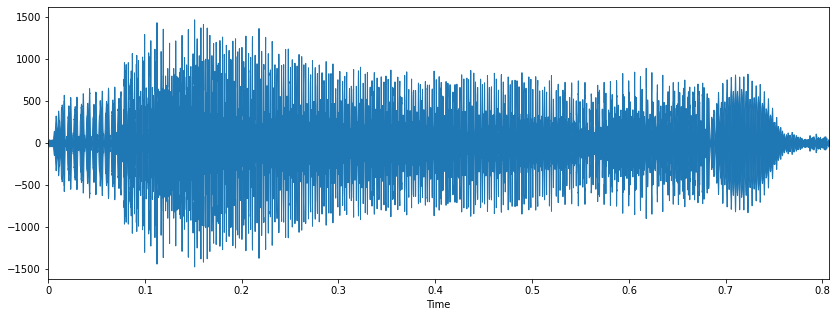

In [6]:
# visualize the Audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

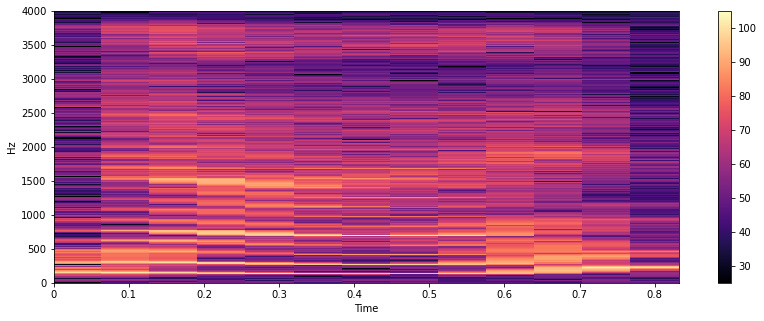

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Spectral Centroid
The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located.

In [8]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(13,)

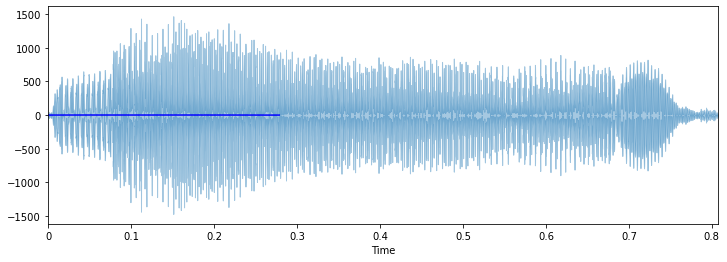

In [9]:
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

### Spectral Rolloff
It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0.

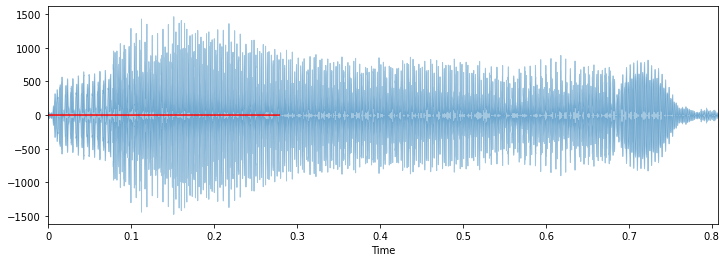

In [10]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### Spectral Bandwidth

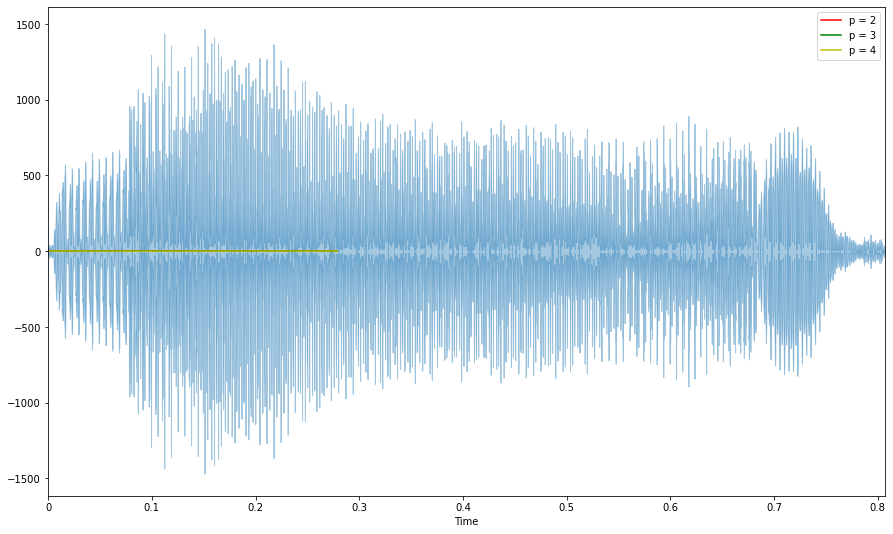

In [11]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(15, 9))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

### Zero-Crossing Rate

0


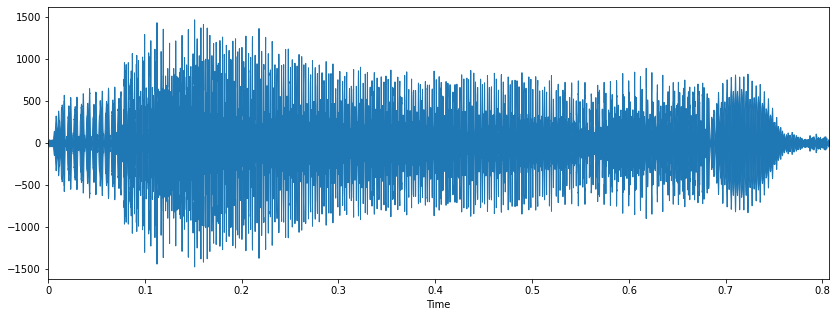

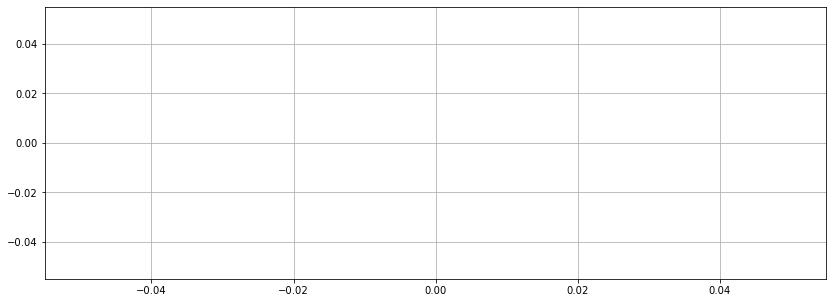

In [12]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16

### Mel-Frequency Cepstral Coefficients(MFCCs)

(20, 13)


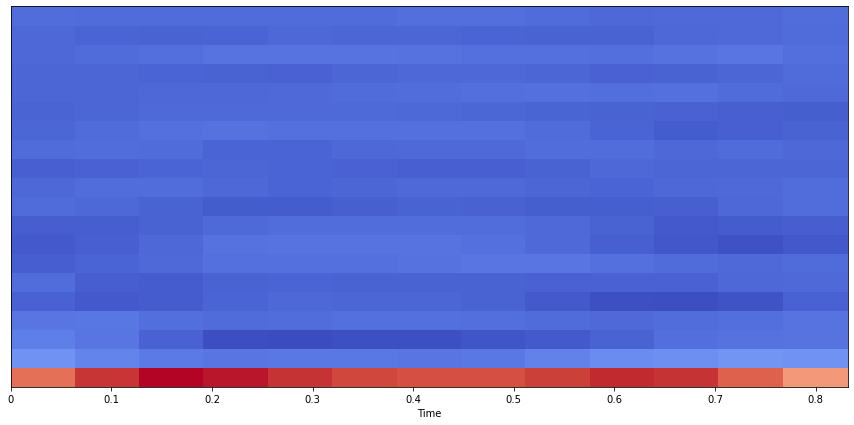

In [13]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Chroma feature

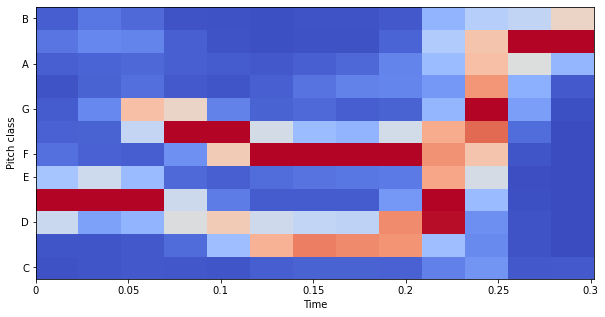

In [14]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
plt.figure(figsize=(10, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')